In [1]:
import numpy as np
import matplotlib.pyplot as plt
import glob,os, re
from matplotlib.ticker import FormatStrFormatter
from tkinter import filedialog
from tkinter import *
import tkinter as tk
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.cm as cm           # import colormap stuff!
import pandas as pd
import scipy.constants as consts

data_folder = r'\\192.168.1.101\Documents\Marcello\Padova\Raman_1310-1550\Data\\'


In [159]:
os.chdir(data_folder)

conv_factor = 2.8*1e13 #[Hz/mW] coversion factor counts CCD
int_time = 0.1 #[s]
losses_db = 3.15
losses_lin = 10**(-losses_db/10)

wl = np.loadtxt('10mW_1530.csv', max_rows=1, delimiter=',')
counts_raw = np.loadtxt('10mW_1530.csv', skiprows=1, delimiter=',')

rate = counts_raw/int_time/conv_factor * losses_lin * 1e-3/(consts.h*consts.c/(wl*1e-9)) 

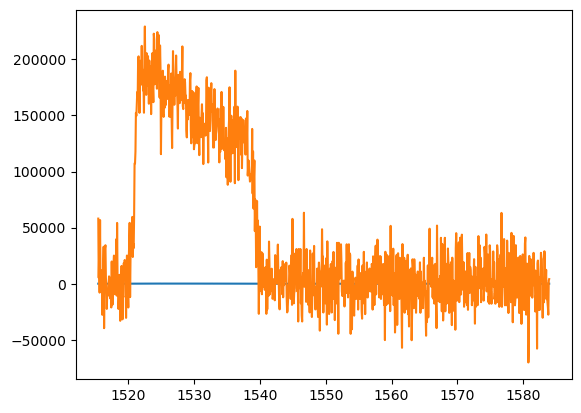

In [327]:
plt.plot(wl, counts_raw)
plt.plot(wl, rate)

# Raman without combiner

In [12]:
os.chdir(data_folder)

conv_factor = 2.8*1e13 #[Hz/mW] coversion factor counts CCD
int_time = 0.1 #[s]
losses_db = 3.15
losses_lin = 10**(-losses_db/10)

pws=np.array([])
channels=np.array([])
wls=[]
counts_raw=[]
for file in glob.glob('*mW_*[0-9].csv'):
    pattern_pw = r'\d+'
    match_pw = re.search(pattern_pw, file)
    pws = np.append(pws, np.int16(match_pw.group()))

    pattern_ch = r'[0-9][0-9][0-9][0-9]'
    match_ch = re.search(pattern_ch, file)
    channels = np.append(channels, np.int16(match_ch.group()))

    wl = np.loadtxt(file, max_rows=1, delimiter=',')
    wls.append(wl)

    counts = np.loadtxt(file, skiprows=1, delimiter=',')
    #print(counts)
    counts_raw.append(counts)


counts_raw = np.array(counts_raw)
rate = counts_raw/int_time/conv_factor * losses_lin * 1e-3/(consts.h*consts.c/(wl*1e-9)) 

counts_raw = counts_raw.tolist()
rate = rate.tolist()


spectra = {'Powers (mW)': pws, 'Channels': channels, 'Wavelengths (nm)': wls, 'Counts CCD': counts_raw, 'Rate (Hz)': rate}



In [13]:
df_spectra=pd.DataFrame(spectra)
df_spectra = df_spectra.sort_values(by=['Powers (mW)','Channels'])
df_spectra = df_spectra.reset_index(drop=True)

df_spectra


,Powers (mW),Channels,Wavelengths (nm),Counts CCD,Rate (Hz)
0,1.0,1530.0,"[1515.4296165752758, 1515.4978124397653, 1515....","[44.0, 4.0, 20.0, -6.0, 43.0, -2.0, 3.0, 9.0, ...","[58043.51216348853, 5276.920380018569, 26385.7..."
1,1.0,1550.0,"[1515.4296165752758, 1515.4978124397653, 1515....","[30.0, -1.0, 26.0, -3.0, 36.0, 0.0, -7.0, 6.0,...","[39575.121929651265, -1319.2300950046422, 3430..."
2,1.0,1570.0,"[1515.4296165752758, 1515.4978124397653, 1515....","[23.0, -8.0, 3.0, 11.0, 8.0, 7.0, -36.0, 13.0,...","[30340.92681273264, -10553.840760037137, 3957...."
3,5.0,1530.0,"[1515.4296165752758, 1515.4978124397653, 1515....","[3.0, -8.0, 13.0, 21.0, 6.0, -18.0, 35.0, -8.0...","[3957.5121929651264, -10553.840760037137, 1715..."
4,5.0,1550.0,"[1515.4296165752758, 1515.4978124397653, 1515....","[-16.0, 5.0, 26.0, 8.0, 24.0, -3.0, 18.0, 10.0...","[-21106.731695814007, 6596.150475023211, 34301..."
5,5.0,1570.0,"[1515.4296165752758, 1515.4978124397653, 1515....","[4.0, 26.0, 12.0, 28.0, 15.0, 6.0, 17.0, 5.0, ...","[5276.682923953502, 34299.982470120696, 15831...."
6,10.0,1530.0,"[1515.4296165752758, 1515.4978124397653, 1515....","[-10.0, 25.0, 20.0, -8.0, 13.0, -10.0, 1.0, 14...","[-13191.707309883755, 32980.752375116055, 2638..."
7,10.0,1550.0,"[1515.4296165752758, 1515.4978124397653, 1515....","[-15.0, 18.0, 20.0, -6.0, 8.0, -11.0, 5.0, 12....","[-19787.560964825632, 23746.141710083557, 2638..."
8,10.0,1570.0,"[1515.4296165752758, 1515.4978124397653, 1515....","[4.0, 6.0, 2.0, -8.0, 6.0, -13.0, 0.0, 4.0, 16...","[5276.682923953502, 7915.380570027853, 2638.57..."
9,20.0,1530.0,"[1515.4296165752758, 1515.4978124397653, 1515....","[-4.0, 23.0, 11.0, -22.0, 1.0, 16.0, -9.0, 8.0...","[-5276.682923953502, 30342.292185106773, 14512..."


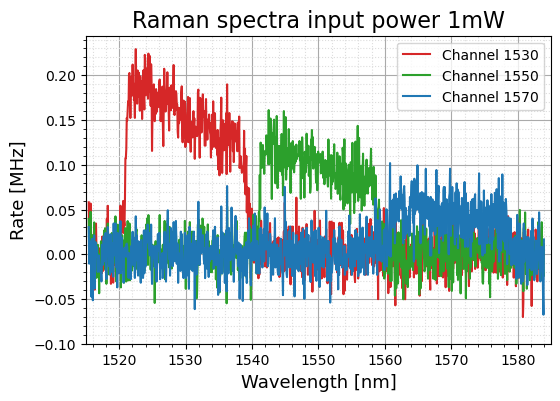

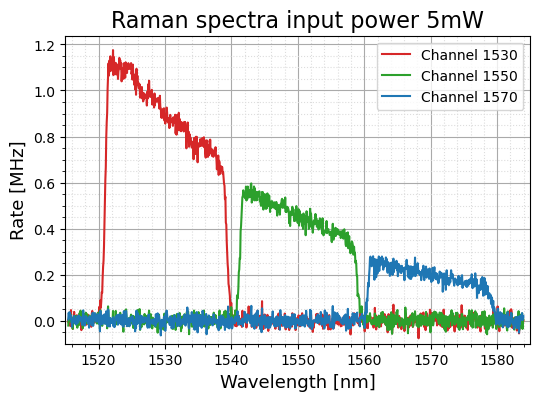

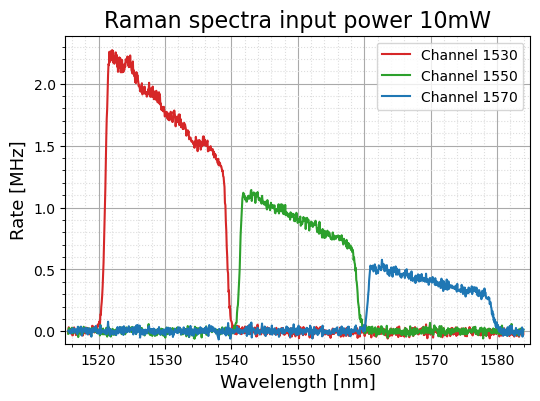

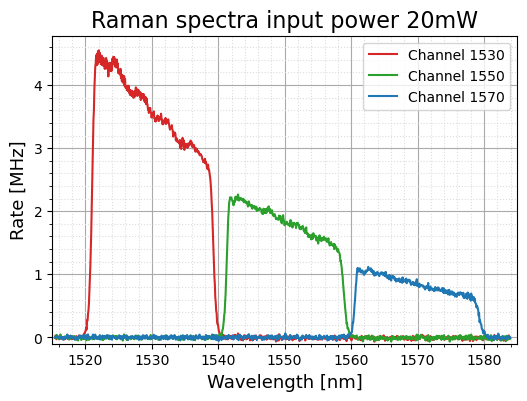

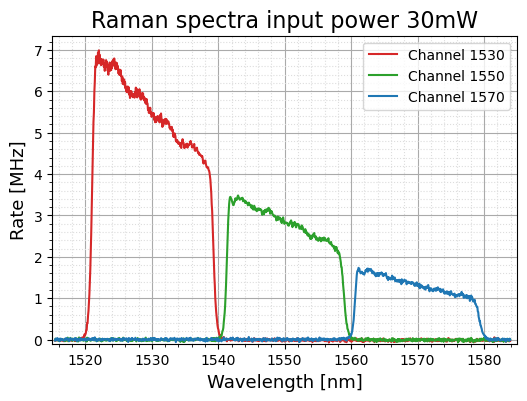

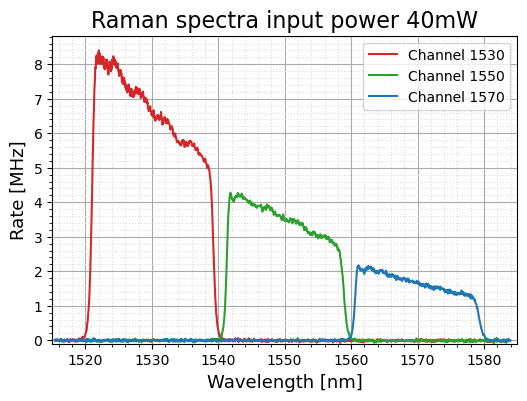

In [115]:
save_path=r'\\192.168.1.101\Documents\Marcello\Padova\Raman_1310-1550\\'

for pow in np.int32(sorted(set(df_spectra['Powers (mW)']))):
    plt.figure(figsize=(6,4))
    plt.title("Raman spectra input power {}mW".format(pow), fontsize=16)
    plt.ylabel('Rate [MHz]', fontsize=13)
    plt.xlabel('Wavelength [nm]', fontsize=13)

    for ch, label, color in zip(sorted(set(df_spectra['Channels'])), ['Channel 1530','Channel 1550','Channel 1570'], ['tab:red', 'tab:green', 'tab:blue']): 
        # set() prende iterabile con elementi ripetuti e restituisce stesso iterabile con elementi distinti
        ccd_counts = df_spectra.loc[(df_spectra['Powers (mW)'] == pow) & (df_spectra['Channels'] == ch), ['Counts CCD']].squeeze()
        wl = df_spectra.loc[(df_spectra['Powers (mW)'] == pow) & (df_spectra['Channels'] == ch), ['Wavelengths (nm)']].squeeze()
        rate = df_spectra.loc[(df_spectra['Powers (mW)'] == pow) & (df_spectra['Channels'] == ch), ['Rate (Hz)']].squeeze()
        rate = np.array(rate)
        # .squeeze() elimina le dimensioni superflue di un vettore es: (1,50,1,1) --> (1,50)
    
        plt.plot(wl, rate/1e6, label=label, color=color)

    plt.xlim(1515,1585)
    plt.gca().set_ylim(bottom=-0.1)
    plt.minorticks_on()
    plt.legend()
    plt.grid(which='major', color='#AAAAAA', linestyle='-', zorder=0)
    plt.grid(which='minor', color='#DDDDDD', linestyle=':', zorder=-1)

    filename = 'Raman_spectra_{}mW_input_power.png'.format(pow)
    plt.savefig(save_path+filename, dpi=250)


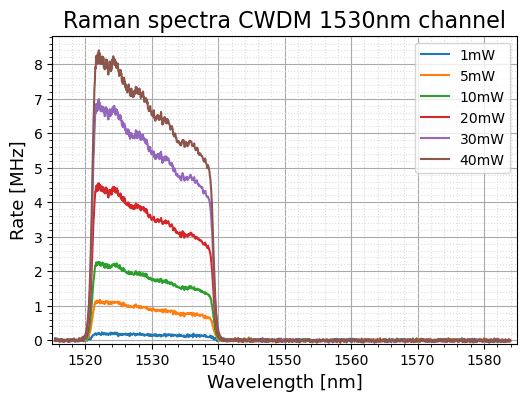

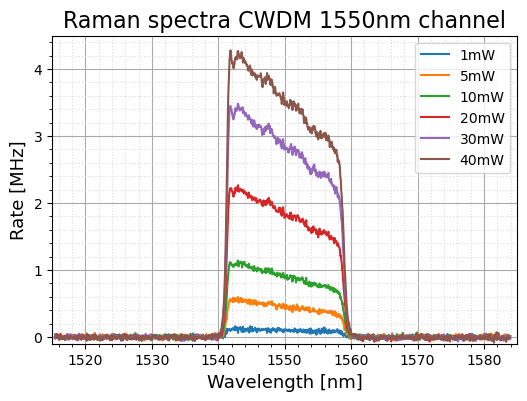

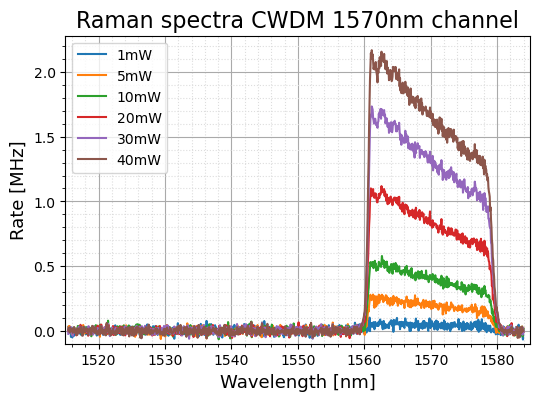

In [134]:
for ch in np.int32(sorted(set(df_spectra['Channels']))):
    plt.figure(figsize=(6,4))
    plt.title("Raman spectra CWDM {}nm channel".format(ch), fontsize=16)
    plt.ylabel('Rate [MHz]', fontsize=13)
    plt.xlabel('Wavelength [nm]', fontsize=13)

    for pow in sorted(set(df_spectra['Powers (mW)'])): 
        label = '{}mW'.format(np.int32(pow))
        # set() prende iterabile con elementi ripetuti e restituisce stesso iterabile con elementi distinti
        ccd_counts = df_spectra.loc[(df_spectra['Channels'] == ch) & (df_spectra['Powers (mW)'] == pow), ['Counts CCD']].squeeze()
        wl = df_spectra.loc[(df_spectra['Channels'] == ch) & (df_spectra['Powers (mW)'] == pow), ['Wavelengths (nm)']].squeeze()
        rate = df_spectra.loc[(df_spectra['Channels'] == ch) & (df_spectra['Powers (mW)'] == pow), ['Rate (Hz)']].squeeze()
        rate = np.array(rate)
        # .squeeze() elimina le dimensioni superflue di un vettore es: (1,50,1,1) --> (1,50)
        plt.plot(wl, rate/1e6, label=label)

    plt.xlim(1515,1585)
    plt.gca().set_ylim(bottom=-0.1)
    plt.minorticks_on()
    plt.legend()
    plt.grid(which='major', color='#AAAAAA', linestyle='-', zorder=0)
    plt.grid(which='minor', color='#DDDDDD', linestyle=':', zorder=-1)

    filename = 'Raman_spectra_{}nm_CWDM_channel.png'.format(ch)
    plt.savefig(save_path+filename, dpi=250)

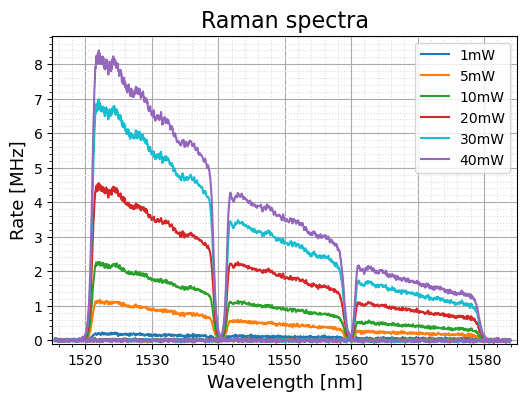

In [158]:
plt.figure(figsize=(6,4))
plt.title("Raman spectra", fontsize=16)
plt.ylabel('Rate [MHz]', fontsize=13)
plt.xlabel('Wavelength [nm]', fontsize=13)


for pow, color in zip(np.int32(sorted(set(df_spectra['Powers (mW)']))), ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:cyan', 'tab:purple']):   
    for ch in np.int32(sorted(set(df_spectra['Channels']))): 
        # set() prende iterabile con elementi ripetuti e restituisce stesso iterabile con elementi distinti
        ccd_counts = df_spectra.loc[(df_spectra['Channels'] == ch) & (df_spectra['Powers (mW)'] == pow), ['Counts CCD']].squeeze()
        wl = df_spectra.loc[(df_spectra['Channels'] == ch) & (df_spectra['Powers (mW)'] == pow), ['Wavelengths (nm)']].squeeze()
        rate = df_spectra.loc[(df_spectra['Channels'] == ch) & (df_spectra['Powers (mW)'] == pow), ['Rate (Hz)']].squeeze()
        rate = np.array(rate)
        # .squeeze() elimina le dimensioni superflue di un vettore es: (1,50,1,1) --> (1,50)
        if ch==1530:
           label = '{}mW'.format(pow) 
        else:
           label = None

        plt.plot(wl, rate/1e6, color=color, label=label)    

plt.xlim(1515,1585)
plt.gca().set_ylim(bottom=-0.1)
plt.minorticks_on()
plt.legend() 
plt.grid(which='major', color='#AAAAAA', linestyle='-', zorder=0)
plt.grid(which='minor', color='#DDDDDD', linestyle=':', zorder=-1)

filename = 'Full_Raman_spectra.png'
plt.savefig(save_path+filename, dpi=250)

# Raman with combiner

In [3]:
os.chdir(data_folder)

conv_factor = 2.8*1e13 #[Hz/mW] coversion factor counts CCD
int_time = 0.1 #[s]
losses_db = 3.15
losses_lin = 10**(-losses_db/10)

pws=np.array([])
channels=np.array([])
wls=[]
counts_raw=[]
for file in glob.glob('*mW_*[0-9]_combiner.csv'):
    pattern_pw = r'\d+'
    match_pw = re.search(pattern_pw, file)
    pws = np.append(pws, np.int16(match_pw.group()))

    pattern_ch = r'[0-9][0-9][0-9][0-9]'
    match_ch = re.search(pattern_ch, file)
    channels = np.append(channels, np.int16(match_ch.group()))

    wl = np.loadtxt(file, max_rows=1, delimiter=',')
    wls.append(wl)

    counts = np.loadtxt(file, skiprows=1, delimiter=',')
    #print(counts)
    counts_raw.append(counts)


counts_raw = np.array(counts_raw)
rate = counts_raw/int_time/conv_factor * losses_lin * 1e-3/(consts.h*consts.c/(wl*1e-9)) 

counts_raw = counts_raw.tolist()
rate = rate.tolist()


spectra_combiner = {'Powers (mW)': pws, 'Channels': channels, 'Wavelengths (nm)': wls, 'Counts CCD': counts_raw, 'Rate (Hz)': rate}

In [4]:
df_spectra_combiner=pd.DataFrame(spectra_combiner)
df_spectra_combiner = df_spectra_combiner.sort_values(by=['Powers (mW)','Channels'])
df_spectra_combiner = df_spectra_combiner.reset_index(drop=True)

df_spectra_combiner

,Powers (mW),Channels,Wavelengths (nm),Counts CCD,Rate (Hz)
0,5.0,1530.0,"[1515.4296165752758, 1515.4978124397653, 1515....","[9.0, 1.0, 10.0, 24.0, -7.0, -21.0, 17.0, -19....","[11872.536578895379, 1319.2300950046422, 13192..."
1,10.0,1530.0,"[1515.4296165752758, 1515.4978124397653, 1515....","[-6.0, -1.0, -12.0, 10.0, -36.0, -16.0, -3.0, ...","[-7915.024385930253, -1319.2300950046422, -158..."
2,10.0,1550.0,"[1515.4296165752758, 1515.4978124397653, 1515....","[21.0, 8.0, -15.0, -28.0, -1.0, -17.0, 1.0, 8....","[27702.585350755886, 10553.840760037137, -1978..."
3,20.0,1530.0,"[1515.4296165752758, 1515.4978124397653, 1515....","[-4.0, 6.0, -22.0, 13.0, -18.0, -8.0, -5.0, 6....","[-5276.682923953502, 7915.380570027853, -29024..."
4,20.0,1550.0,"[1515.4296165752758, 1515.4978124397653, 1515....","[-7.0, 7.0, -19.0, 8.0, -14.0, 2.0, -8.0, 10.0...","[-9234.195116918629, 9234.610665032495, -25066..."
5,30.0,1530.0,"[1515.4296165752758, 1515.4978124397653, 1515....","[10.0, 10.0, -26.0, -1.0, -31.0, -11.0, -5.0, ...","[13191.707309883755, 13192.300950046421, -3430..."
6,30.0,1550.0,"[1515.4296165752758, 1515.4978124397653, 1515....","[2.0, 5.0, -16.0, 8.0, -6.0, -17.0, 15.0, -19....","[2638.341461976751, 6596.150475023211, -21108...."
7,30.0,1570.0,"[1515.4296165752758, 1515.4978124397653, 1515....","[14.0, -1.0, -15.0, -6.0, -6.0, -10.0, 9.0, 2....","[18468.390233837257, -1319.2300950046422, -197..."
8,40.0,1530.0,"[1515.4296165752758, 1515.4978124397653, 1515....","[15.0, -4.0, -5.0, -9.0, -13.0, -6.0, 15.0, -1...","[19787.560964825632, -5276.920380018569, -6596..."
9,40.0,1550.0,"[1515.4296165752758, 1515.4978124397653, 1515....","[17.0, 6.0, 9.0, 6.0, -9.0, -3.0, 3.0, -6.0, 2...","[22425.902426802382, 7915.380570027853, 11873...."


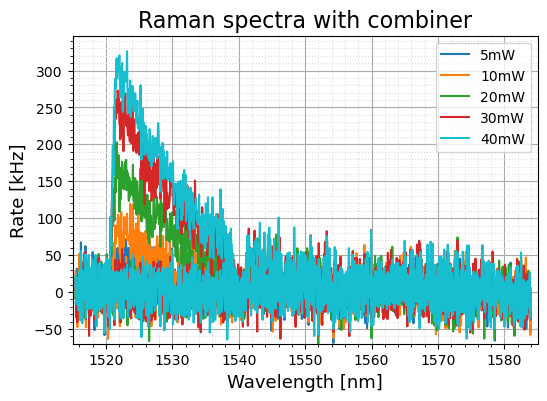

In [40]:
save_path=r'\\192.168.1.101\Documents\Marcello\Padova\Raman_1310-1550\\'

plt.figure(figsize=(6,4))
plt.title("Raman spectra with combiner", fontsize=16)
plt.ylabel('Rate [kHz]', fontsize=13)
plt.xlabel('Wavelength [nm]', fontsize=13)


for pow, color in zip(np.int32(sorted(set(df_spectra_combiner['Powers (mW)']))), ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:cyan', 'tab:purple']):   
    for ch in np.int32(sorted(set(df_spectra_combiner['Channels']))): 
        # set() prende iterabile con elementi ripetuti e restituisce stesso iterabile con elementi distinti
        ccd_counts = df_spectra_combiner.loc[(df_spectra_combiner['Channels'] == ch) & (df_spectra_combiner['Powers (mW)'] == pow), ['Counts CCD']].squeeze()
        wl = df_spectra_combiner.loc[(df_spectra_combiner['Channels'] == ch) & (df_spectra_combiner['Powers (mW)'] == pow), ['Wavelengths (nm)']].squeeze()
        rate = df_spectra_combiner.loc[(df_spectra_combiner['Channels'] == ch) & (df_spectra_combiner['Powers (mW)'] == pow), ['Rate (Hz)']].squeeze()
        rate = np.array(rate)
        # .squeeze() elimina le dimensioni superflue di un vettore es: (1,50,1,1) --> (1,50)
        if ch==1530:
           label = '{}mW'.format(pow) 
        else:
           label = None

        plt.plot(wl, rate/1e3, color=color, label=label)    

plt.xlim(1515,1585)
plt.gca().set_ylim(bottom=-70)
plt.minorticks_on()
plt.legend() 
plt.grid(which='major', color='#AAAAAA', linestyle='-', zorder=0)
plt.grid(which='minor', color='#DDDDDD', linestyle=':', zorder=-1)

filename = 'Full_Raman_spectra_combiner.png'
plt.savefig(save_path+filename, dpi=250)

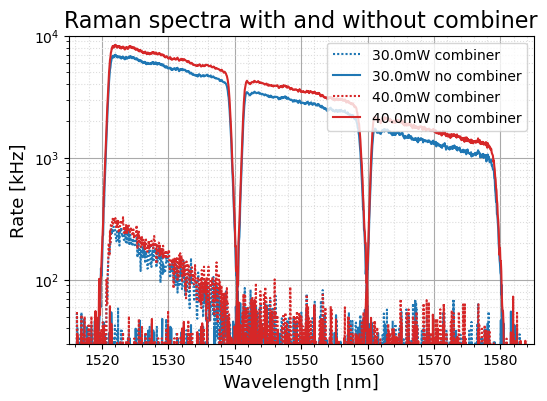

In [37]:
plt.figure(figsize=(6,4))
plt.title("Raman spectra with and without combiner", fontsize=16)
plt.ylabel('Rate [kHz]', fontsize=13)
plt.xlabel('Wavelength [nm]', fontsize=13)


for pow, color in zip([30.0, 40.0], ['tab:blue','tab:red']):   
    for ch in np.int32(sorted(set(df_spectra_combiner['Channels']))): 
        # set() prende iterabile con elementi ripetuti e restituisce stesso iterabile con elementi distinti
        ccd_counts_comb = df_spectra_combiner.loc[(df_spectra_combiner['Channels'] == ch) & (df_spectra_combiner['Powers (mW)'] == pow), ['Counts CCD']].squeeze()
        wl_comb = df_spectra_combiner.loc[(df_spectra_combiner['Channels'] == ch) & (df_spectra_combiner['Powers (mW)'] == pow), ['Wavelengths (nm)']].squeeze()
        rate_comb = df_spectra_combiner.loc[(df_spectra_combiner['Channels'] == ch) & (df_spectra_combiner['Powers (mW)'] == pow), ['Rate (Hz)']].squeeze()
        rate_comb = np.array(rate_comb)
        
        ccd_counts = df_spectra.loc[(df_spectra['Channels'] == ch) & (df_spectra['Powers (mW)'] == pow), ['Counts CCD']].squeeze()
        wl = df_spectra.loc[(df_spectra['Channels'] == ch) & (df_spectra['Powers (mW)'] == pow), ['Wavelengths (nm)']].squeeze()
        rate = df_spectra.loc[(df_spectra['Channels'] == ch) & (df_spectra['Powers (mW)'] == pow), ['Rate (Hz)']].squeeze()
        rate = np.array(rate)
        # .squeeze() elimina le dimensioni superflue di un vettore es: (1,50,1,1) --> (1,50)
        if ch==1530:
           label_comb = '{}mW combiner'.format(pow)
           label = '{}mW no combiner'.format(pow) 
        else:
           label_comb = None
           label = None

        plt.plot(wl, rate_comb/1e3, color=color, label=label_comb, linestyle=(0,(1,1)))
        plt.plot(wl, rate/1e3, color=color, label=label)    

plt.xlim(1515,1585)
plt.gca().set_ylim(bottom=30, top=1e4)
plt.yscale('log')
plt.minorticks_on()
plt.legend(loc='upper right') 
plt.grid(which='major', color='#AAAAAA', linestyle='-', zorder=0)
plt.grid(which='minor', color='#DDDDDD', linestyle=':', zorder=-1)

filename = 'Combiner_vs_no_combiner.png'
plt.savefig(save_path+filename, dpi=250)